# 64x64 DCGAN experiment

## Importy + mount drive


In [1]:
# imports
import sys
if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  output_path = "/content/drive/My Drive/gan_files"
  %rm -r /content/BP-Bielko-GAN-Docker
  %rm -r /content/src
  !git clone https://github.com/2021-FIIT-Bc-projects/BP-Bielko-GAN-Docker.git
  !cp -r /content/BP-Bielko-GAN-Docker/src /content/
  %cd gan
else:
    output_path = ""

from src.dcgan_models import *

2021-11-22 01:07:43.379148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 01:07:43.379209: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
list_physical_devices('GPU')

NameError: name 'list_physical_devices' is not defined

## Stiahnutie Flickr-Faces-HQ datasetu
Možnosť A: Stiahnuť dataset nanovo - veľká pravdepodobnosť vyčerpania download kvóty

Možnosť B: Načítať pred-pripravený zip súbor s datasetom 

In [11]:
# A
# %cd /content/
!git clone https://github.com/NVlabs/ffhq-dataset.git
%cd ffhq-dataset
!python download_ffhq.py --thumbs

Cloning into 'ffhq-dataset'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 67 (delta 2), reused 4 (delta 2), pack-reused 60
Unpacking objects: 100% (67/67), 3.88 MiB | 1.44 MiB/s, done.
/home/jovyan/gan/ffhq-dataset
\ 100.00% done  2/2 files  0.25/0.25 GB   3.58 MB/s   ETA: done    
Parsing JSON metadata...
\   2.36% done  1656/70001 files  0.05/1.96 GB   1.13 MB/s   ETA: 28m 48s ^C
Traceback (most recent call last):
  File "/home/jovyan/gan/ffhq-dataset/download_ffhq.py", line 445, in <module>
    run_cmdline(sys.argv)
  File "/home/jovyan/gan/ffhq-dataset/download_ffhq.py", line 440, in run_cmdline
    run(**vars(args))
  File "/home/jovyan/gan/ffhq-dataset/download_ffhq.py", line 409, in run
    download_files(specs, **download_kwargs)
  File "/home/jovyan/gan/ffhq-dataset/download_ffhq.py", line 204, in download_files
    exc_info = exception_queue.get(timeout=status_delay)
  File "/

In [ ]:
# B
!mkdir /content/ffhq-dataset
!unzip "/content/drive/MyDrive/ffhq_dataset_thumbs/dataset_download.zip" -d "/content/ffhq-dataset"

## Definície modelov, funkcií - TODO real sample dict + predeterined samples prerob, sprav funkciu co nastavi rozmery

In [2]:
# definicie modelu

#default_width = 64
#default_height = 64
#default_dims = 100
#pixel_depth = 3 #rgb

model_name = "dcgan_128"

p_dims = 100
p_n = 100
predetermined_inputs = np.random.randn(p_dims * p_n)  # n vektorov z gauss. distrib.
predetermined_inputs = predetermined_inputs.reshape(p_n, p_dims)

## Vytvorenie modelu

In [3]:
generator = Generator(128, 128, n_dim=100, n_paralell_samples=256)
discriminator = Discriminator(128, 128, n_filters=128, dataset_path="dataset_download/thumbnails128x128")

gan = GAN(generator, discriminator, width=128, height=128, model_name=model_name, output_path=output_path)


2021-11-22 01:07:47.453277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-22 01:07:47.453331: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-22 01:07:47.453357: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (191f0c32b871): /proc/driver/nvidia/version does not exist
2021-11-22 01:07:47.453575: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument 

## TODO tieto metadata ukladaj, zapisuj do metadata list index z batch namiesto času v hod.

In [4]:
open(f'{output_path}/{model_name}/outputs/evaluation/epoch_metadata.txt', 'w').close()

In [4]:
metadata_list = []

## Trénovací proces

[Epoch 0] Batch 0/1400
[Epoch 0/1, Batch 0/1400]
        Time since start: 0:00:28.850334
        Disc. loss real: 0.8239177465438843
        Disc. loss fake: 1.0869613885879517
        Gen. loss: 1.2670193910598755
        Acc. real: 1.0
        Acc. fake: 0.0 (of 100 samples)
        


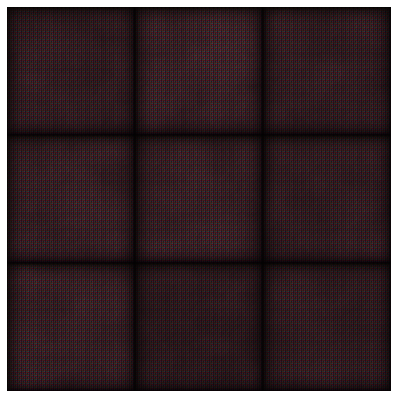

[Epoch 0] Batch 1/1400
[Epoch 0] Batch 2/1400
[Epoch 0/1, Batch 2/1400]
        Time since start: 0:01:18.164060
        Disc. loss real: 0.10870236158370972
        Disc. loss fake: 0.6383341550827026
        Gen. loss: 0.9501094818115234
        Acc. real: 1.0
        Acc. fake: 1.0 (of 100 samples)
        


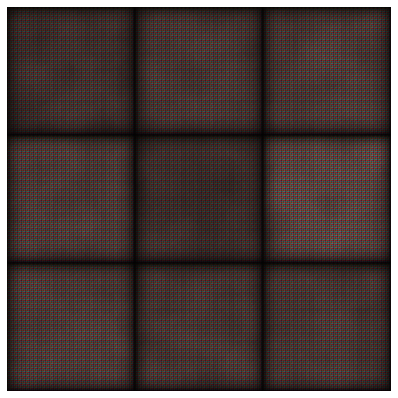

[Epoch 0] Batch 3/1400
[Epoch 0] Batch 4/1400
[Epoch 0/1, Batch 4/1400]
        Time since start: 0:02:05.491398
        Disc. loss real: 0.14328433573246002
        Disc. loss fake: 0.41322872042655945
        Gen. loss: 1.9116178750991821
        Acc. real: 1.0
        Acc. fake: 1.0 (of 100 samples)
        


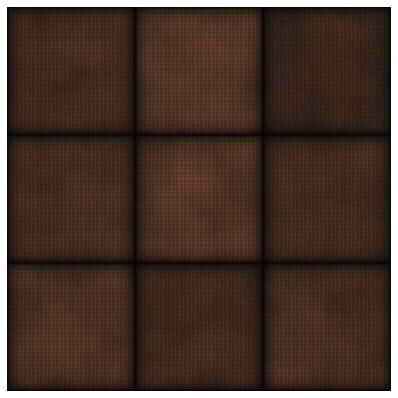

[Epoch 0] Batch 5/1400
[Epoch 0] Batch 6/1400
[Epoch 0/1, Batch 6/1400]
        Time since start: 0:02:52.892075
        Disc. loss real: 0.050531212240457535
        Disc. loss fake: 0.20711244642734528
        Gen. loss: 2.5372045040130615
        Acc. real: 1.0
        Acc. fake: 1.0 (of 100 samples)
        


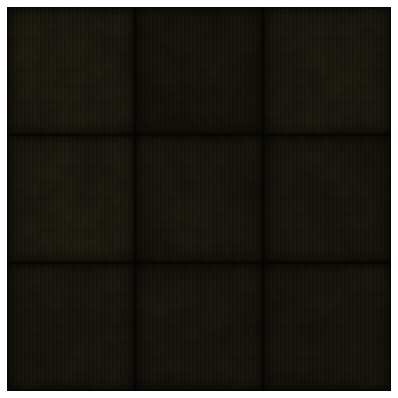

[Epoch 0] Batch 7/1400
[Epoch 0] Batch 8/1400
[Epoch 0/1, Batch 8/1400]
        Time since start: 0:03:40.605184
        Disc. loss real: 0.0075422972440719604
        Disc. loss fake: 0.2193761020898819
        Gen. loss: 2.9088690280914307
        Acc. real: 0.9900000095367432
        Acc. fake: 1.0 (of 100 samples)
        


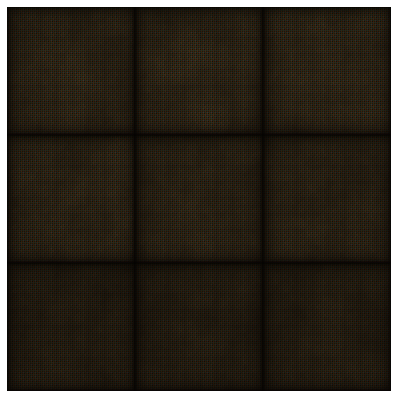

[Epoch 0] Batch 9/1400
[Epoch 0] Batch 10/1400
[Epoch 0/1, Batch 10/1400]
        Time since start: 0:04:28.107752
        Disc. loss real: 0.07626424729824066
        Disc. loss fake: 0.16092640161514282
        Gen. loss: 5.922145843505859
        Acc. real: 0.8899999856948853
        Acc. fake: 1.0 (of 100 samples)
        


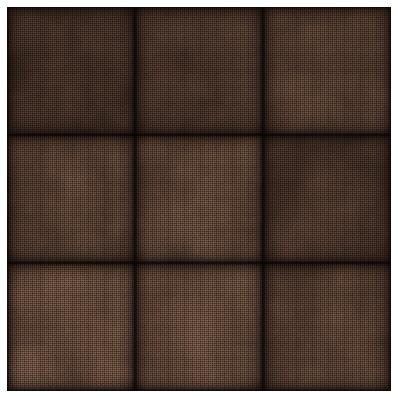

[Epoch 0] Batch 11/1400


In [ ]:
from_epoch = 0
to_epoch = 1

dataset_size = 70000

a = datetime.datetime.now()



gan.train_gan(dataset_size, metadata_list,
                n_dim=100, start_epoch=from_epoch, n_epochs=to_epoch,
                n_batch=dataset_size//700, n_eval=2, eval_samples=100, n_plot=2, plot_size=9)

b = datetime.datetime.now()
print("Time taken: ", b - a)

generator.save_weights(f"{output_path}/{model_type}/saves/generator_{to_epoch}.hdf5", overwrite=True)
discriminator.save_weights(f"{output_path}/{model_type}/saves/discriminator_{to_epoch}.hdf5", overwrite=True)